# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Aqilah Putri Alifah
- **Email:** p.alifah@gmail.com
- **ID Dicoding:** qilalifa

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap peminjaman sepeda per tahunnya?
- Apakah ada jam-jam tertentu di mana peminjaman sepeda pada puncaknya untuk tiap tahunnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_data = pd.read_csv("day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_data = pd.read_csv("hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai tabel day_data

In [4]:
print("Columns: ",day_data.columns)
print("Shape: ",day_data.shape)
print("Info: ")
day_data.info()
print("\nMissing Values:")
print(day_data.isnull().sum())
print("\nUnique Values:")
print(day_data.nunique())

Columns:  Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Shape:  (731, 16)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64

Menilai tabel hour_data

In [5]:
print("Columns: ",hour_data.columns)
print("Shape: ",hour_data.shape)
print("Info: ")
hour_data.info()
print("\nMissing Values:")
print(hour_data.isnull().sum())
print("\nUnique Values:")
print(hour_data.nunique())

Columns:  Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Shape:  (17379, 17)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non

### Cleaning Data

Clenaning tabel day_data dari duplikasi dan missing value

In [6]:
print("Duplikasi:", day_data.duplicated().sum())
day_data.drop_duplicates(inplace=True)

Duplikasi: 0


In [7]:
missing_day = day_data.isnull().sum()
if missing_day.any():
    print("Missing Value: ")
    print(missing_day)
    day_data.fillna(method='ffill', inplace=True)
else:
    print("No Missing Value")

No Missing Value


Cleaning tabel hour_data dari duplikasi dan missing value

In [9]:
print("Duplikasi:", hour_data.duplicated().sum())
hour_data.drop_duplicates(inplace=True)

Duplikasi: 0


In [10]:
missing_hour = hour_data.isnull().sum()
if missing_hour.any():
    print("Missing Value: ")
    print(missing_hour)
    hour_data.fillna(method='ffill', inplace=True)
else:
    print("No Missing Value")

No Missing Value


## Exploratory Data Analysis (EDA)

### Menghitung penggunaan sepeda berdasarkan cuaca untuk tiap tahunnya
Mengubah nilai cuaca menjadi lebih deskriptif seperti "Sunny", "Rain", dan "Heavy Rain". Untuk menghitung jumlah peminjaman sepeda menggunakan fungsi `sum()`



In [11]:
day_data["weathersit"] = day_data["weathersit"].replace({
    1: "Sunny",
    2: "Rain",
    3: "Heavy Rain"})
day_data["year"] = pd.to_datetime(day_data["dteday"]).dt.year

In [12]:
bike_counts_by_weather = pd.pivot_table(day_data, values="cnt", index="year", columns="weathersit", aggfunc="sum", fill_value=0)
print("Jumlah Peminjaman Sepeda berdasarkan cuaca")
print(bike_counts_by_weather)

Jumlah Peminjaman Sepeda berdasarkan cuaca
weathersit  Heavy Rain    Rain    Sunny
year                                   
2011             25112  382924   835067
2012             12757  613934  1422885


### Menghitung Peminjaman Sepeda Berdasarkan Jam untuk tiap tahun
Mengitung total sepeda yang dipinjam untuk tiap jamnya dengan menggunakan fungsi `sum()`




In [13]:
hour_data["year"] = pd.to_datetime(hour_data["dteday"]).dt.year

In [14]:
pivot_hour = pd.pivot_table(hour_data, values="cnt", index="hr", columns="year", aggfunc="sum", fill_value=0)
print("Jumlah Peminjaman Sepeda berdasarkan jam")
print(pivot_hour)

Jumlah Peminjaman Sepeda berdasarkan jam
year    2011    2012
hr                  
0      15540   23590
1       9558   14606
2       6661    9691
3       3441    4733
4       1817    2611
5       5157    9104
6      20801   34331
7      56930   97241
8      95467  165534
9      59486   99952
10     47511   78746
11     56598   94722
12     69198  115216
13     69339  115580
14     66482  109170
15     68590  114559
16     85622  142126
17    127632  209228
18    116985  192787
19     85802  140987
20     62818  101732
21     48875   76570
22     37677   57935
23     25116   38825


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pengaruh cuaca terhadap peminjaman sepeda per tahunnya?

Kode di bawah membuat Bar chart untuk menampilkan total jumlah peminjaman sepeda berdasarkan cuaca pertahunnya.

Dari Bar chart dibawah dapat dilihat bahwa **peminjaman sepeda untuk tahun 2011 dan 2012 paling banyak ada pada cuaca Sunny**.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


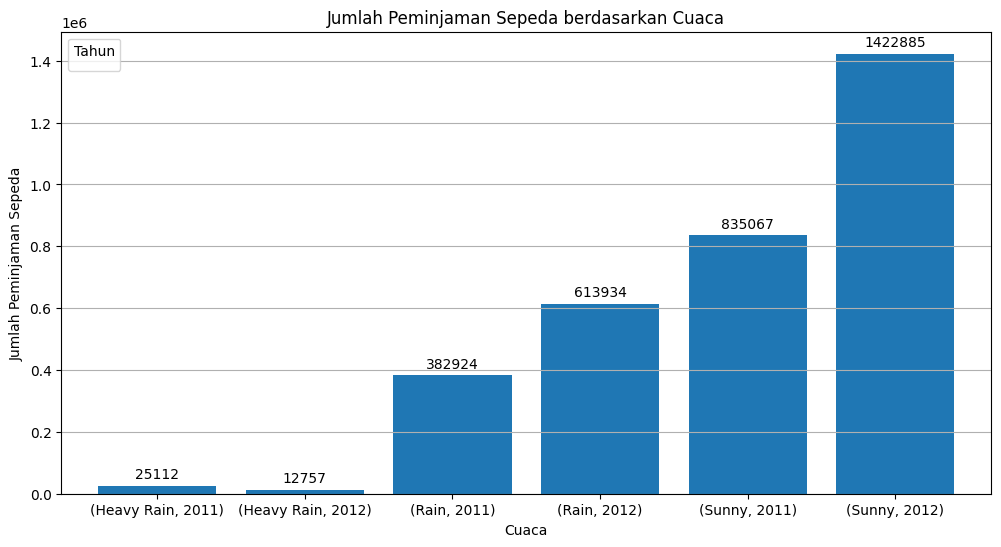

In [16]:
ax = bike_counts_by_weather.unstack().plot(kind="bar", figsize=(12, 6), width=0.8)
plt.title("Jumlah Peminjaman Sepeda berdasarkan Cuaca")
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(rotation=0)
plt.legend(title="Tahun")
plt.grid(axis="y")
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height),
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()

### Pertanyaan 2:
Apakah ada jam-jam tertentu di mana peminjaman sepeda pada puncaknya untuk tiap tahunnya?

Kode di bawah membuat Line chart untuk menampilkan jumlah peminjaman tiap jam untuk tiap tahunnya.

Dari Line chart dibawah dapat dilihat bahwa **peminjaman sepeda ada pada puncaknya untuk tahun 2011 dan 2012 adalah pukul 08.00 dan pukul 17.00**.

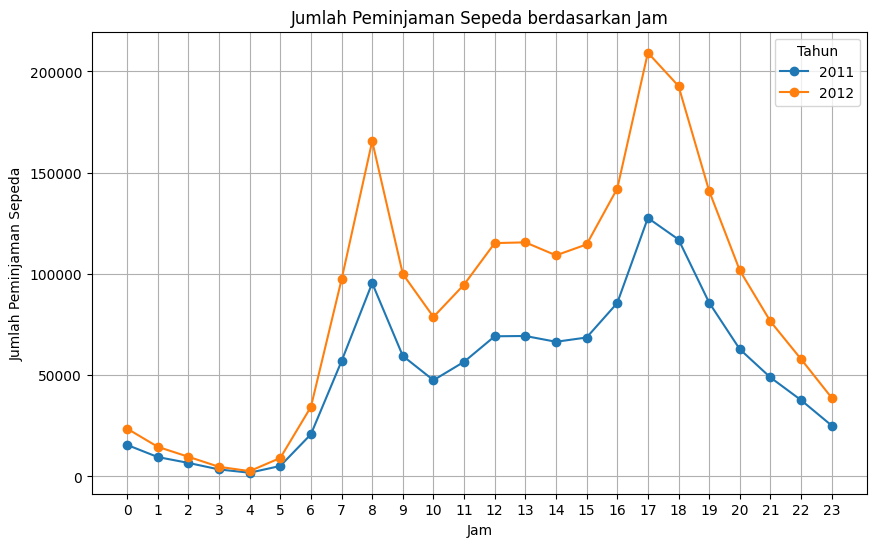

In [17]:
pivot_hour.plot(kind="line", figsize=(10, 6), marker='o')
plt.title("Jumlah Peminjaman Sepeda berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(range(24))
plt.grid(True)
plt.legend(title="Tahun")
plt.show()

## Conclusion

### Pertanyaan 1:
Bagaimana pengaruh cuaca terhadap peminjaman sepeda per tahunnya?

Berdasarkan dari hasil analisis, dapat disimpulkan bahwa cuaca memiliki pengaruh terhadap jumlah peminjaman sepeda.

1.   Untuk tahun 2011, jumlah peminjaman sepeda paling banyak saat kondisi cuaca *sunny* dengan total jumlah **8.35.067**.
2.   Untuk tahun 2012, jumlah peminjaman sepeda paling banyak saat kondisi cuaca *sunny* dengan total jumlah **14.22.885**.
3.   Tahun 2012 memiliki peningkatan jumlah peminjaman sepeda dari pada tahun 2011 dengan kondisi cuaca yang sama
4.   Kondisi cuaca *Rain*, dan *Heavy rain* mengalami penurunan total jumlah peminjaman.





### Pertanyaan 2:
Apakah ada jam-jam tertentu di mana peminjaman sepeda pada puncaknya untuk tiap tahunnya?

Berdasarkan dari hasil analisis, dapat disimpulkan bahwa.

1.   Untuk tahun 2011, puncak peminjaman sepeda terjadi pada pukul 08.00 dengan total **95.467** dan pukul 17.00 dengan total **127.632**.
2. Untuk tahun 2012, puncak peminjaman sepeda terjadi pada pukul 08.00 dengan total **165.534** dan pukul 17.00 dengan total **209.228**.
3. Jumlah peminjaman pada tahun 2012 lebih banyak dari pada jumlah peminjaman pada tahun 2011 untuk jam yang sama.





